In [1]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
plt.style.use("ggplot")

In [2]:
def simple_bar(table,title,x_label,y_label,color_string):
    
    figsize=(15,10)
    table.plot.bar(figsize=figsize, color=f'{color_string}')
    plt.title(f'{title}', fontsize=16)
    plt.grid(True)
    plt.xlabel(f'{x_label}')
    plt.ylabel(f'{y_label}')
    
    
    
def simple_barh(table,title,x_label,y_label,color_string):
    
    figsize=(15,10)
    table.plot.barh(figsize=figsize, color=f'{color_string}')
    plt.title(f'{title}', fontsize=16)
    plt.grid(True)
    plt.xlabel(f'{x_label}')
    plt.ylabel(f'{y_label}')

In [3]:
path='/Users/przemyslawczekaj/Downloads/Tableou/Recalls_Data.csv'

In [4]:
df=pd.read_csv(path)

In [5]:
df.set_index(['Report Received Date'], inplace=True)

In [6]:
df.drop(columns=['Recall Link','Mfr Campaign Number'], inplace=True)

In [7]:
worst_manufactures=df['Manufacturer'].value_counts().head(10)
worst_manufactures.rename(index ={'General Motors, LLC':'General Motors','Ford Motor Company':'Ford Motor',
                                  'Chrysler (FCA US, LLC)':'Chrysler','Volkswagen Group of America, Inc.':'Volkswagen',
                                 'BMW of North America, LLC':'BMW','Forest River, Inc.':'Forest River',
                                  'Daimler Trucks North America, LLC':'Daimler','Mercedes-Benz USA, LLC':'Mercedes-Benz',
                                 'Honda (American Honda Motor Co.)':'Honda','PACCAR Incorporated':'PACCAR'},inplace=True)

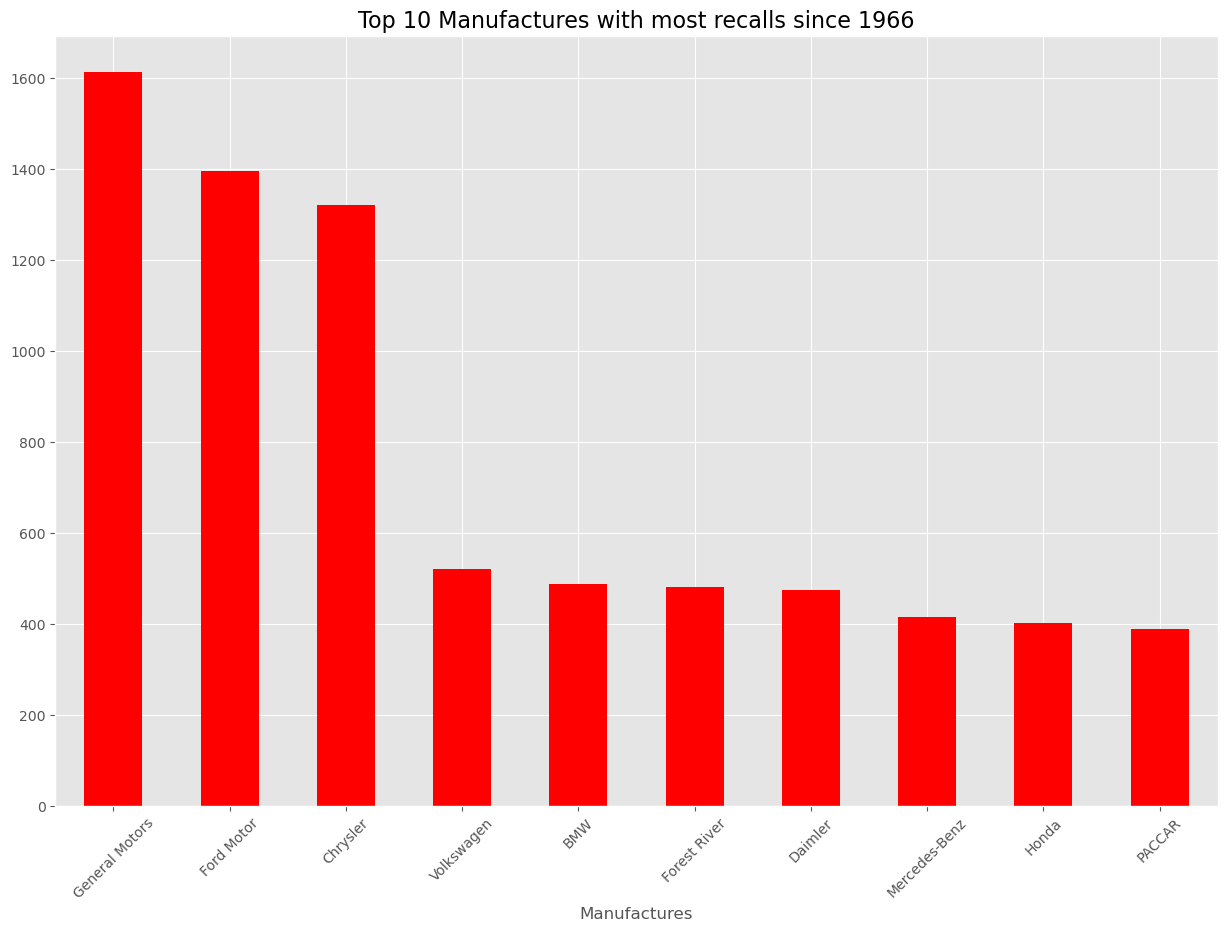

In [8]:
simple_bar(worst_manufactures,'Top 10 Manufactures with most recalls since 1966','Manufactures','','r')
plt.xticks(rotation=45)
plt.show()

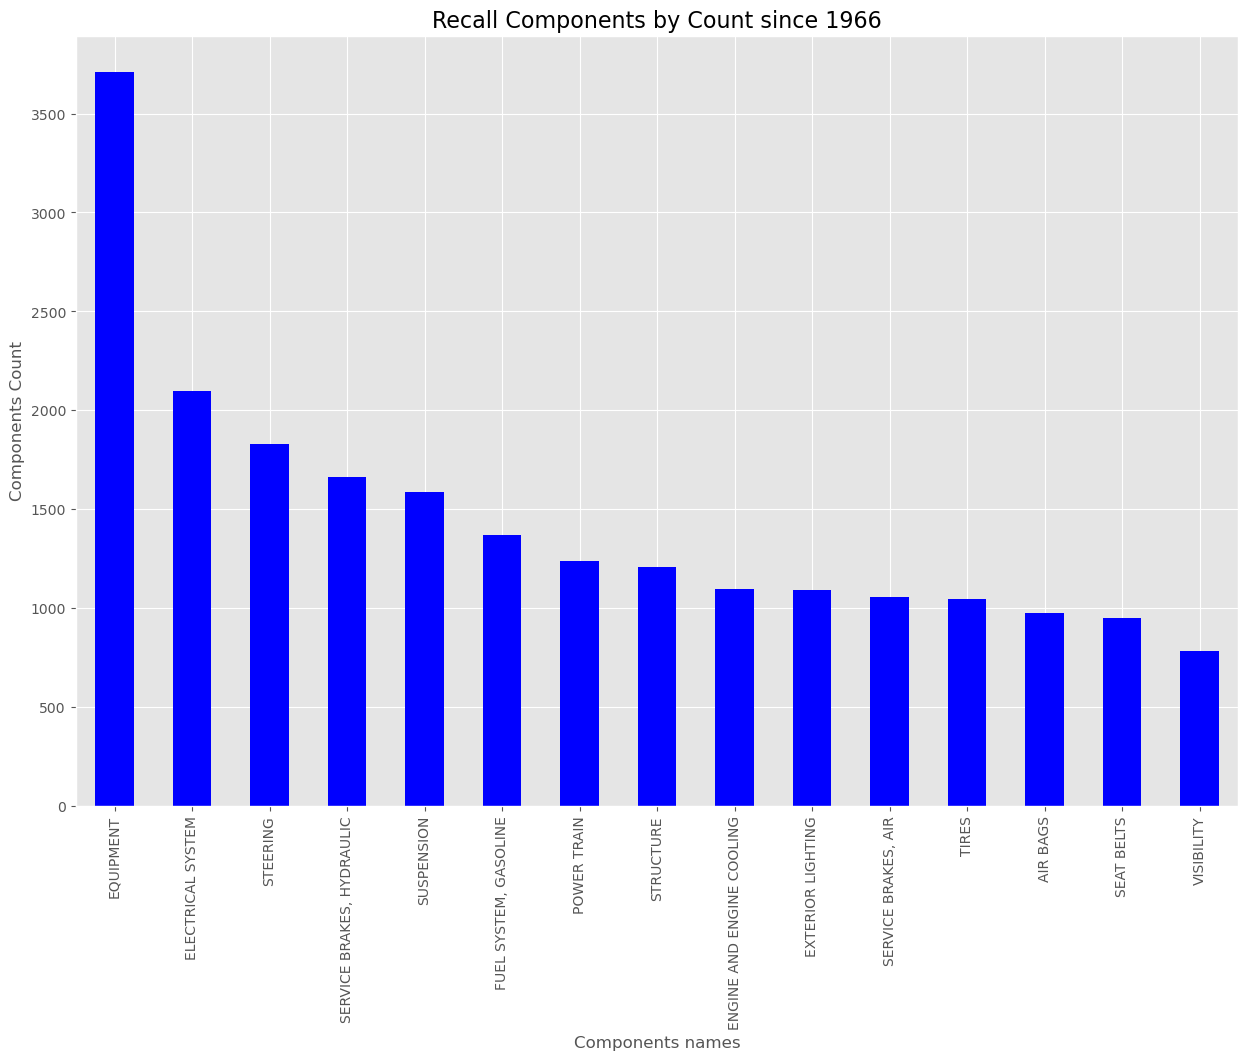

In [9]:
top_15_recalls=df['Component'].value_counts().head(15)
simple_bar(top_15_recalls,'Recall Components by Count since 1966','Components names','Components Count','b')

In [10]:
df_equip_group=df[['Manufacturer','Component']]
df_manu_recall_comp=df_equip_group.value_counts().to_frame('Count').head(10)
df_manu_recall_comp.rename(index ={'General Motors, LLC':'General Motors','Ford Motor Company':'Ford Motor',
                                  'Chrysler (FCA US, LLC)':'Chrysler','Cooper Tire & Rubber Co.':'Cooper Tire','Forest River, Inc.':'Forest River',
                                  'Daimler Trucks North America, LLC':'Daimler'},inplace=True)

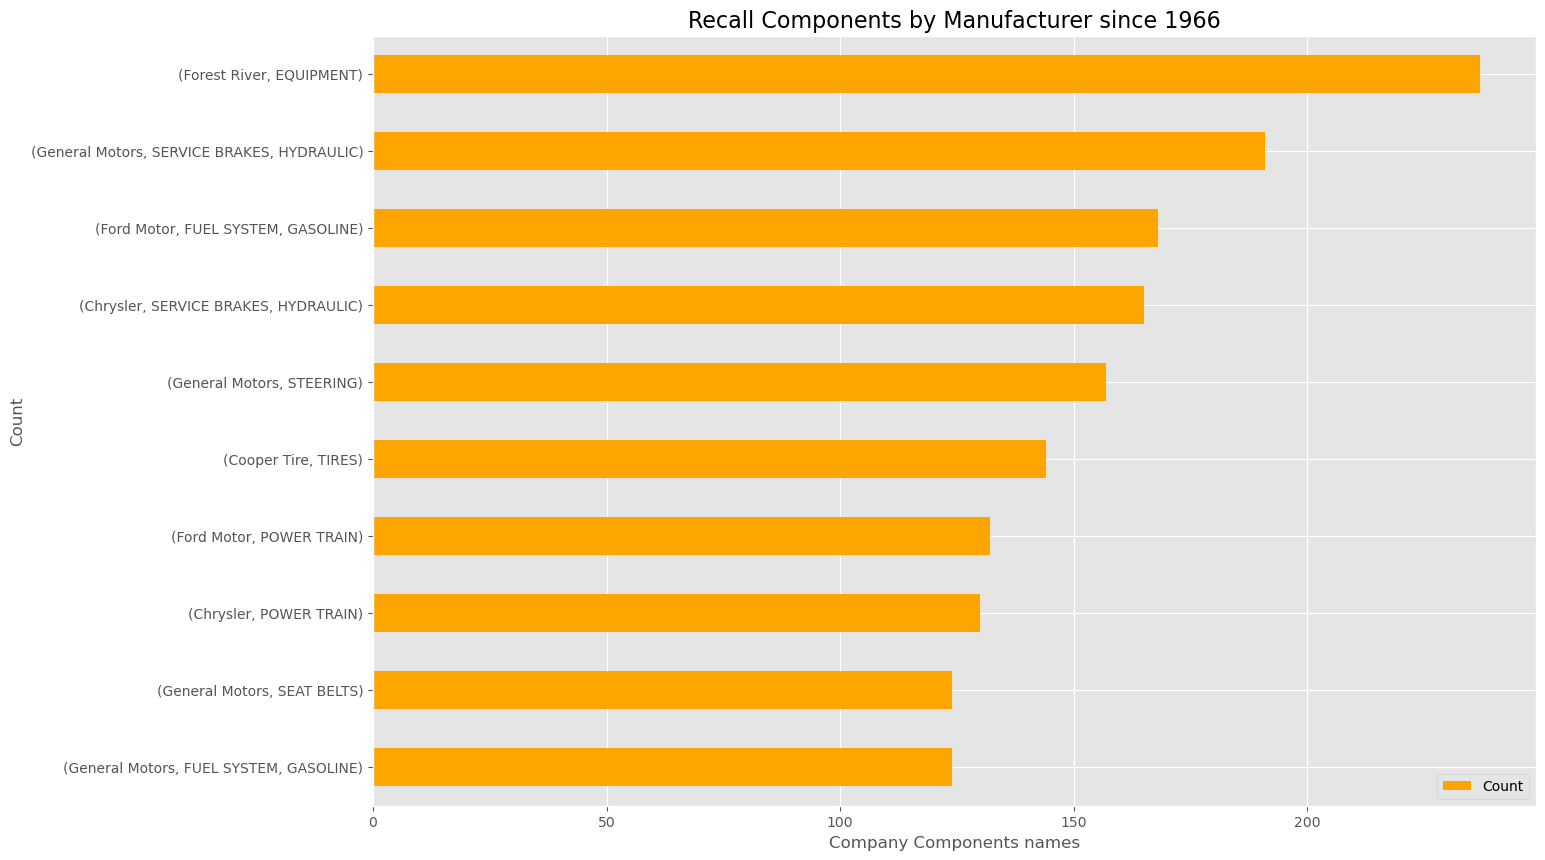

In [11]:
simple_barh(df_manu_recall_comp.sort_values(by='Count',ascending=True),'Recall Components by Manufacturer since 1966','Company Components names','Count','orange')

In [12]:
df.index=pd.to_datetime(df.index)
df.index = df.index.to_period('Y')
number_per_year=df.index.value_counts()
sorted_years=number_per_year.sort_values()
#number_per_year.sort_index(ascending=True, inplace=True)

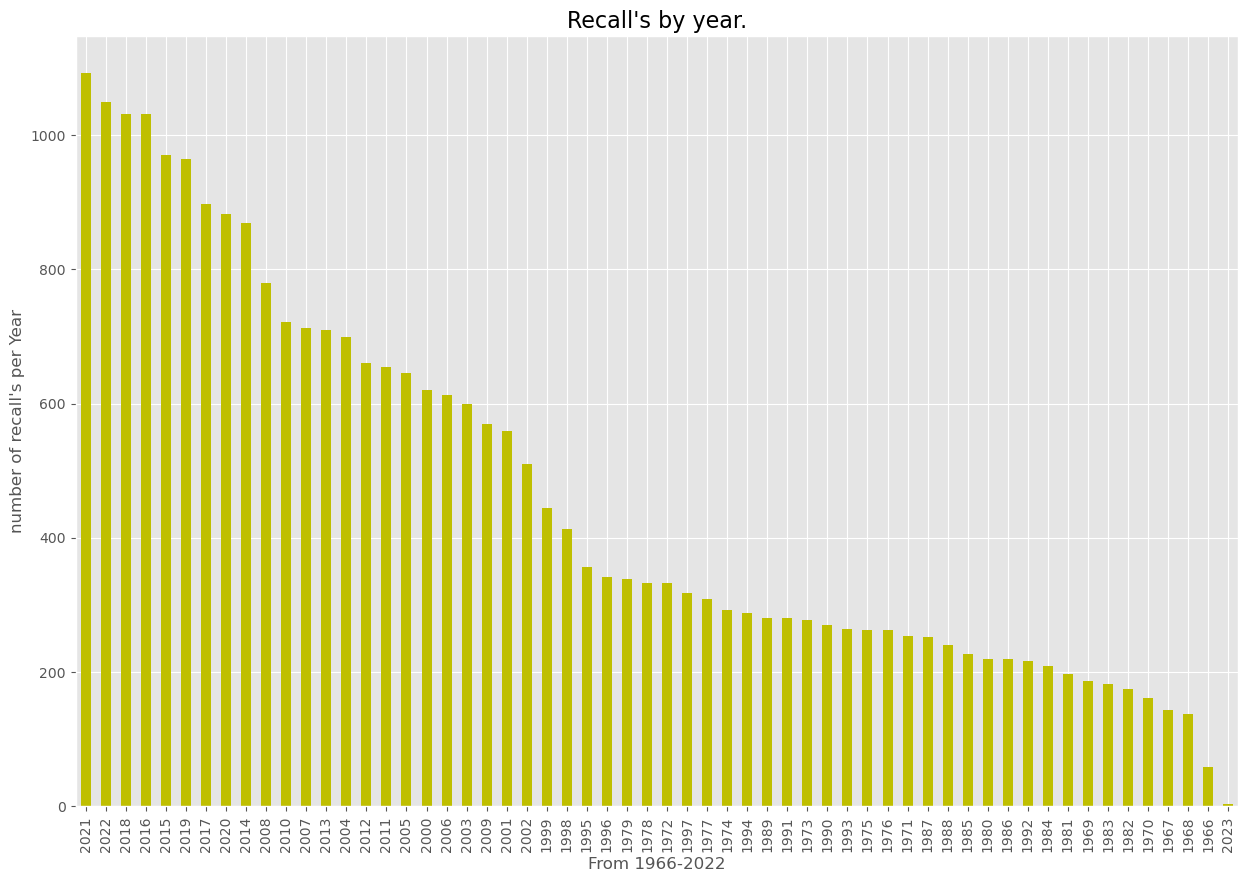

In [13]:
simple_bar(number_per_year,"Recall's by year.","From 1966-2022","number of recall's per Year",'y')

In [14]:

total_pos_cases=df[['Manufacturer','Potentially Affected']]
df['Potentially Affected']=pd.to_numeric(df['Potentially Affected'],errors='coerce')

In [15]:
total_pos_cases=df[['Manufacturer','Potentially Affected']]

In [16]:
total_pos_cases=total_pos_cases.groupby(['Manufacturer'],as_index=False).sum()

In [17]:
total_pos_cases.sort_values(by='Potentially Affected',ascending=False, inplace=True)

In [18]:
total_pos_cases.set_index(['Manufacturer'])

,Potentially Affected
Manufacturer,
"General Motors, LLC",137565.0
Ford Motor Company,100560.0
"Chrysler (FCA US, LLC)",99296.0
"Forest River, Inc.",68583.0
Blue Bird Body Company,62325.0
...,...
MILWAUKEE ELECTRIC TOOL CORP.,0.0
"Saab Cars North America, Inc.",0.0
Safety Belt Solutions Ltd,0.0


In [19]:
sum_=df['Potentially Affected'].sum()
total_pos_cases['As Percentage']=(total_pos_cases['Potentially Affected']/sum_)*100
total_pos_cases.drop(columns='Potentially Affected',inplace=True)
total_pos_cases=total_pos_cases.round(2)
total_pos_cases=total_pos_cases.head(10)

In [20]:
total_pos_cases.drop(columns='Manufacturer',inplace=True)

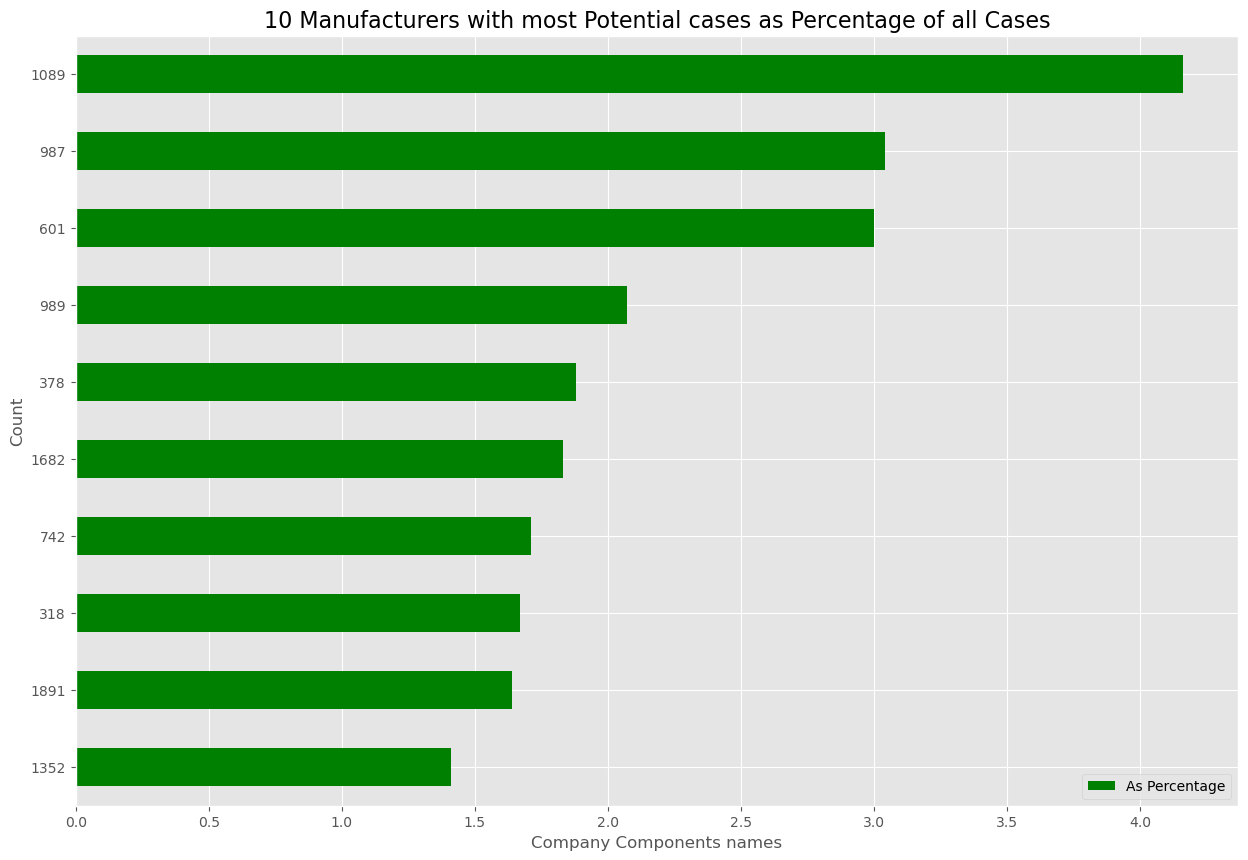

In [21]:
simple_barh(total_pos_cases.sort_values('As Percentage',ascending=True),'10 Manufacturers with most Potential cases as Percentage of all Cases','Company Components names','Count','green')

In [22]:
total_pos_cases

,As Percentage
1089,4.16
987,3.04
601,3.00
989,2.07
378,1.88
1682,1.83
742,1.71
318,1.67
1891,1.64
1352,1.41


In [35]:
sum_

3307238.0

In [38]:
df.to_csv('Recalls.csv')